<a href="https://www.kaggle.com/code/anderaraujo/used-car-sales-prediction-with-logreg?scriptVersionId=105620636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# USED CAR SALES PREDICTION WITH LOGISTIC REGRESSION

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 
import scipy.stats as stats

In [2]:
data = pd.read_csv('../input/usedcar-data/UserCarData.csv')
data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [3]:
data.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rpm', '

In [4]:
data.drop('torque', axis=1, inplace = True)

I decided to skip this column, because I would have to convert the units of torque

## Checking null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  seats              7906 non-null   int64  
 16  sold               7906 

In [6]:
data.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
seats                0
sold                 0
dtype: int64

There is no null in the dataset

## Checking duplicated

In [7]:
data.duplicated().sum()

0

## Separating  text columns from numerical columns

In [8]:
str_cols = data.select_dtypes(include='object').columns
nb_cols = data.select_dtypes(exclude='object').columns

In [9]:
{col:len(data[col].unique()) for col in data[str_cols].columns}

{'name': 31,
 'Region': 4,
 'State or Province': 49,
 'City': 1310,
 'fuel': 4,
 'seller_type': 3,
 'transmission': 2,
 'owner': 5,
 'sold': 2}

I won't get to many columns when I get dummies from the data. So, I decided to skip columns that have more than 30 unique values

In [10]:
data.drop(['City','State or Province','Sales_ID'], axis= 1, inplace = True)

In [11]:
str_cols = data.select_dtypes(include='object').columns
nb_cols = data.select_dtypes(exclude='object').columns

In [12]:
str_cols = str_cols.drop('sold')

In [13]:
{col:len(data[col].unique()) for col in data[str_cols].columns}

{'name': 31,
 'Region': 4,
 'fuel': 4,
 'seller_type': 3,
 'transmission': 2,
 'owner': 5}

In [14]:
dummies = pd.get_dummies(data[str_cols]).reset_index(drop=True)

In [15]:
dummies['sold'] = data['sold']

In [16]:
nb_data = data[nb_cols]

## Identifying outliers

In [17]:
nb_data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [18]:
def boxplot(y, sx, sy, tt):
    fig, ax = plt.subplots(figsize=(sx,sy))
    sns.boxplot(y = y)
    plt.title(tt)
    plt.show()

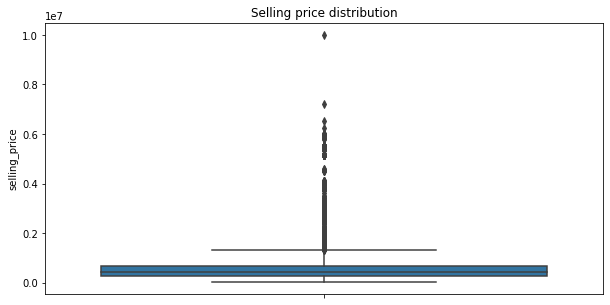

In [19]:
boxplot(nb_data['selling_price'], 10,5, 'Selling price distribution')

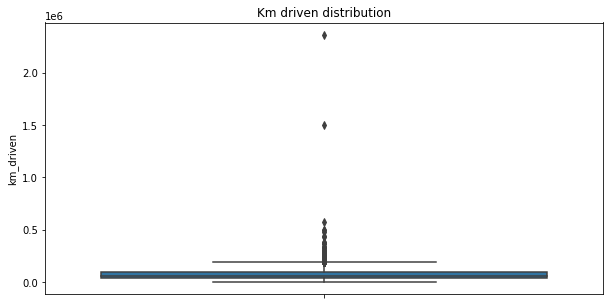

In [20]:
boxplot(nb_data['km_driven'], 10,5, 'Km driven distribution')

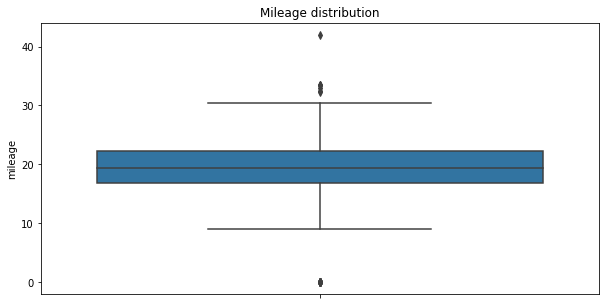

In [21]:
boxplot(nb_data['mileage'], 10,5, 'Mileage distribution')

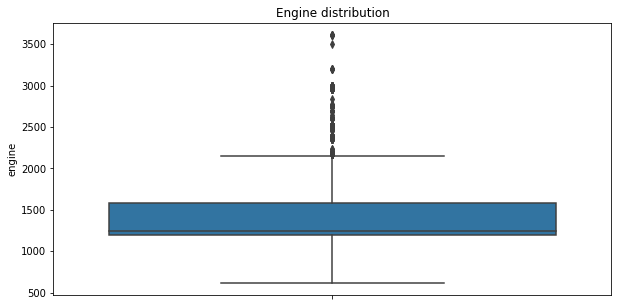

In [22]:
boxplot(nb_data['engine'], 10,5, 'Engine distribution')

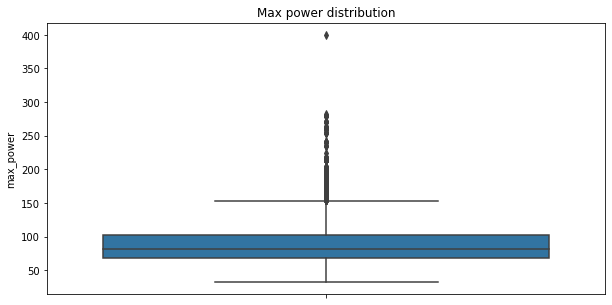

In [23]:
boxplot(nb_data['max_power'], 10,5, 'Max power distribution')

In [24]:
# concatenating numerical and text data
nb_data_no_outlier = pd.concat([dummies, nb_data], axis = 1)

In [25]:
# Transforming 'sold' column

nb_data_no_outlier['sold'].replace('Y', 1, inplace = True)
nb_data_no_outlier['sold'].replace('N', 0, inplace = True)

## Deleting outliers

In [26]:
# function to get outliers

def get_outlier(y):
    h_outlier = np.quantile(y, 0.75) + 1.5 * stats.iqr(y)
    l_outlier = np.quantile(y, 0.25) - 1.5 * stats.iqr(y)
    outliers = [h_outlier, l_outlier]
    return(outliers)

In [27]:
for col in nb_cols:
    nb_data_no_outlier.loc[(nb_data_no_outlier[col] > get_outlier(nb_data_no_outlier[col])[0])|(nb_data_no_outlier[col] < get_outlier(nb_data_no_outlier[col])[1]), col] = np.nan
nb_data_no_outlier

,name_Ambassador,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,...,owner_Test_Drive_Car,owner_Third_Owner,sold,year,selling_price,km_driven,mileage,engine,max_power,seats
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2014.0,450000.0,145500.0,23.40,1248.0,74.00,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2014.0,370000.0,120000.0,21.14,1498.0,103.52,5.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2006.0,158000.0,140000.0,17.70,1497.0,78.00,5.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2010.0,225000.0,127000.0,23.00,1396.0,90.00,5.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2007.0,130000.0,120000.0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2013.0,320000.0,110000.0,18.50,1197.0,82.85,5.0
7902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2007.0,135000.0,119000.0,16.80,1493.0,110.00,5.0
7903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2009.0,382000.0,120000.0,19.30,1248.0,73.90,5.0
7904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2013.0,290000.0,25000.0,23.57,1396.0,70.00,5.0


In [28]:
nb_data_no_outlier.isna().sum()

name_Ambassador                    0
name_Ashok                         0
name_Audi                          0
name_BMW                           0
name_Chevrolet                     0
name_Daewoo                        0
name_Datsun                        0
name_Fiat                          0
name_Force                         0
name_Ford                          0
name_Honda                         0
name_Hyundai                       0
name_Isuzu                         0
name_Jaguar                        0
name_Jeep                          0
name_Kia                           0
name_Land                          0
name_Lexus                         0
name_MG                            0
name_Mahindra                      0
name_Maruti                        0
name_Mercedes                      0
name_Mitsubishi                    0
name_Nissan                        0
name_Opel                          0
name_Renault                       0
name_Skoda                         0
n

In [29]:
nb_data_no_outlier = nb_data_no_outlier.dropna().reset_index(drop=True)
nb_data_no_outlier

,name_Ambassador,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,...,owner_Test_Drive_Car,owner_Third_Owner,sold,year,selling_price,km_driven,mileage,engine,max_power,seats
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2014.0,450000.0,145500.0,23.40,1248.0,74.00,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2014.0,370000.0,120000.0,21.14,1498.0,103.52,5.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2006.0,158000.0,140000.0,17.70,1497.0,78.00,5.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2010.0,225000.0,127000.0,23.00,1396.0,90.00,5.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2007.0,130000.0,120000.0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2013.0,320000.0,110000.0,18.50,1197.0,82.85,5.0
5555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2007.0,135000.0,119000.0,16.80,1493.0,110.00,5.0
5556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2009.0,382000.0,120000.0,19.30,1248.0,73.90,5.0
5557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2013.0,290000.0,25000.0,23.57,1396.0,70.00,5.0


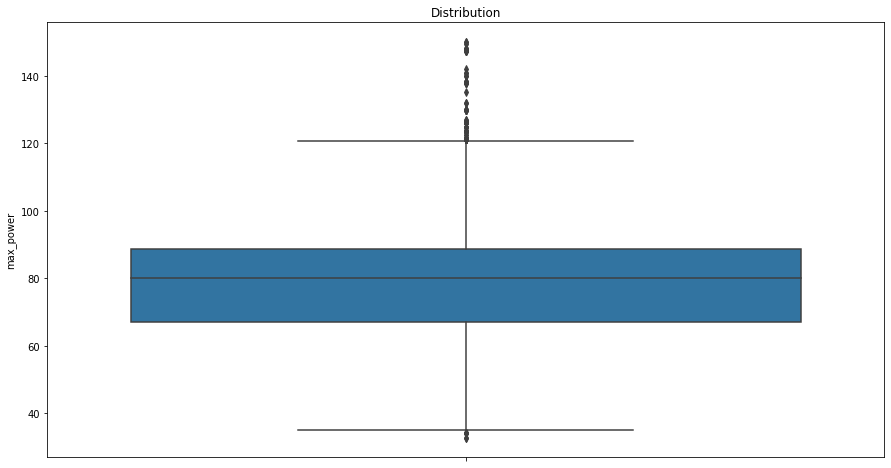

In [30]:
boxplot(nb_data_no_outlier['max_power'], 15,8,'Distribution')

## Getting Y and X's and Normalizing values

In [31]:
x = nb_data_no_outlier.drop('sold', axis=1)
y = nb_data_no_outlier['sold']

In [32]:
norm = Normalizer()
norm_data = norm.fit_transform(x)

In [33]:
transformed_data = pd.DataFrame(norm_data, columns = norm.feature_names_in_)
transformed_data

,name_Ambassador,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,...,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,year,selling_price,km_driven,mileage,engine,max_power,seats
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.004258,0.951487,0.307648,0.000049,0.002639,0.000156,0.000011
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000003,0.0,0.000000,0.005178,0.951203,0.308498,0.000054,0.003851,0.000266,0.000013
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000005,0.009502,0.748401,0.663140,0.000084,0.007091,0.000369,0.000024
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.007779,0.870812,0.491525,0.000089,0.005403,0.000348,0.000019
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.011343,0.734736,0.678218,0.000091,0.007336,0.000498,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.005949,0.945664,0.325072,0.000055,0.003537,0.000245,0.000015
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.011151,0.750089,0.661190,0.000093,0.008295,0.000611,0.000028
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.005017,0.954018,0.299691,0.000048,0.003117,0.000185,0.000012
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.006915,0.996269,0.085885,0.000081,0.004796,0.000240,0.000017


## Separating Testing data from Training data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state= 0)

## Defining Logistic Regression model

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predicting values

In [36]:
y_preds = model.predict(X_test)

In [37]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

## Getting accuracy

In [38]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_preds)
print(f'Accuracy of the model: {score*100:.2f}%')

Accuracy of the model: 75.90%


## Ploting ROC curve

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)

In [40]:
from sklearn.metrics import auc
area = auc(fpr, tpr)

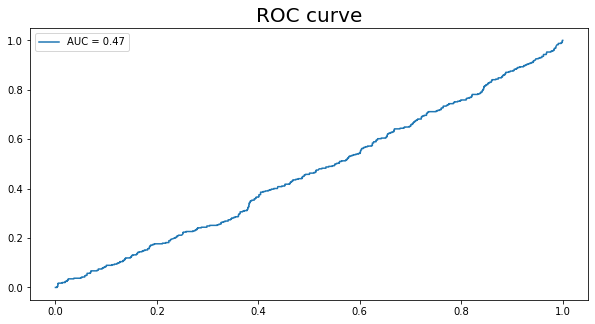

In [41]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(fpr, tpr, label = f'AUC = {area:.2f}')
ax.set_title('ROC curve', dict(fontsize= 20))
ax.legend()
plt.show()